In [36]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = pd.read_csv('/home/urwa/Documents/side_projects/urban/data/featureData/jfk.csv')

In [28]:
def train(model, optimiser, scheduler, criterion,epochs = 500):
    losses = []
    # Main optimization loop
    for t in range(epochs):

        optimiser.zero_grad()

        y_predicted = model(X_train)

        current_loss = criterion(y_predicted, y_train)

        current_loss.backward()

        optimiser.step()

        print(f"t = {t}, loss = {current_loss}")

        losses.append(current_loss)

        scheduler.step()    
    return losses,model

In [5]:
dataset.shape

(8757, 1049)

In [6]:
dataset.head(3)

,Date,Hour,1,10,100,101,102,106,107,108,...,91_lag_3,92_lag_3,93_lag_3,94_lag_3,95_lag_3,96_lag_3,97_lag_3,98_lag_3,99_lag_3,arrival_lag_3
0,2018-01-01,3,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,6.0
1,2018-01-01,4,0,3,0,0,1,0,0,1,...,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0
2,2018-01-01,5,0,4,0,0,1,2,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [23]:
class Linear_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Linear_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
        
    def forward(self, x):
        return self.fc1(x)

In [24]:
class Simple_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=out_features, bias=True)
        
    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [13]:
lag_columns = [c for c in dataset.columns if 'lag' in c]
len(lag_columns)

777

In [14]:
DateColumns = ['Date']

ext_columns = ['Dow', 'arrival','maxtemp', 'mintemp', 'avgtemp', 'departure', 'hdd',
       'cdd', 'participation', 'newsnow', 'snowdepth', 'ifSnow']

targetColumns = [c for c in dataset.columns if c not in ext_columns and \
                c not in DateColumns and c not in lag_columns and c != 'Hour']
len(targetColumns)

258

In [15]:
features_cols = [c for c in dataset.columns if c not in targetColumns and c not in DateColumns]
len(features_cols)

790

In [68]:
x = dataset[features_cols].values
y = dataset[targetColumns].values

In [69]:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# scaler_x.fit(x)
# scaler_y.fit(y)

# x = scaler_x.transform(x)
# y = scaler_y.transform(y)

In [70]:
x = torch.tensor(x).float().to(device)
print(x.shape)
y = torch.tensor(y).float().to(device)
print(y.shape)

torch.Size([8757, 790])
torch.Size([8757, 258])


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

t = 0, loss = 3.888812780380249
t = 1, loss = 3.4007480144500732
t = 2, loss = 3.658876895904541
t = 3, loss = 3.73158860206604
t = 4, loss = 3.752540111541748
t = 5, loss = 3.7756404876708984
t = 6, loss = 3.7527732849121094
t = 7, loss = 3.797473192214966
t = 8, loss = 3.7566685676574707
t = 9, loss = 3.8064260482788086
t = 10, loss = 3.7481682300567627
t = 11, loss = 3.8099567890167236
t = 12, loss = 3.74222993850708
t = 13, loss = 3.8148205280303955
t = 14, loss = 3.7373712062835693
t = 15, loss = 3.8204710483551025
t = 16, loss = 3.73506236076355
t = 17, loss = 3.8265957832336426
t = 18, loss = 3.733041286468506
t = 19, loss = 3.8308420181274414
t = 20, loss = 3.729478359222412
t = 21, loss = 3.8324778079986572
t = 22, loss = 3.7257165908813477
t = 23, loss = 3.8341257572174072
t = 24, loss = 3.722379684448242
t = 25, loss = 3.8350534439086914
t = 26, loss = 3.719533681869507
t = 27, loss = 3.836516857147217
t = 28, loss = 3.7175676822662354
t = 29, loss = 3.838395118713379
t = 30

t = 348, loss = 1.430778980255127
t = 349, loss = 1.4307760000228882
t = 350, loss = 1.4307729005813599
t = 351, loss = 1.4307698011398315
t = 352, loss = 1.4307669401168823
t = 353, loss = 1.4307637214660645
t = 354, loss = 1.4307607412338257
t = 355, loss = 1.430757761001587
t = 356, loss = 1.4307547807693481
t = 357, loss = 1.4307518005371094
t = 358, loss = 1.4307485818862915
t = 359, loss = 1.4307457208633423
t = 360, loss = 1.430742621421814
t = 361, loss = 1.4307397603988647
t = 362, loss = 1.4307365417480469
t = 363, loss = 1.430733561515808
t = 364, loss = 1.4307305812835693
t = 365, loss = 1.4307273626327515
t = 366, loss = 1.4307246208190918
t = 367, loss = 1.430721402168274
t = 368, loss = 1.430718183517456
t = 369, loss = 1.4307154417037964
t = 370, loss = 1.4307122230529785
t = 371, loss = 1.4307093620300293
t = 372, loss = 1.430706262588501
t = 373, loss = 1.4307031631469727
t = 374, loss = 1.4307001829147339
t = 375, loss = 1.4306970834732056
t = 376, loss = 1.430694222

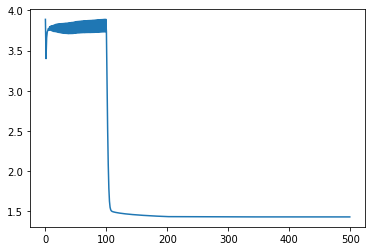

In [72]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Linear_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)


t = 0, loss = 2.4907822608947754
t = 1, loss = 2.269265651702881
t = 2, loss = 2.169722557067871
t = 3, loss = 2.0588111877441406
t = 4, loss = 1.9257808923721313
t = 5, loss = 1.809634804725647
t = 6, loss = 1.7300784587860107
t = 7, loss = 1.6963605880737305
t = 8, loss = 1.6447018384933472
t = 9, loss = 1.6009159088134766
t = 10, loss = 1.554304838180542
t = 11, loss = 1.5119423866271973
t = 12, loss = 1.4857685565948486
t = 13, loss = 1.4713232517242432
t = 14, loss = 1.4607913494110107
t = 15, loss = 1.4213865995407104
t = 16, loss = 1.4061123132705688
t = 17, loss = 1.3891804218292236
t = 18, loss = 1.382995367050171
t = 19, loss = 1.3720481395721436
t = 20, loss = 1.3648608922958374
t = 21, loss = 1.354169487953186
t = 22, loss = 1.3439302444458008
t = 23, loss = 1.3285034894943237
t = 24, loss = 1.3168036937713623
t = 25, loss = 1.2995115518569946
t = 26, loss = 1.2947689294815063
t = 27, loss = 1.2894902229309082
t = 28, loss = 1.2845678329467773
t = 29, loss = 1.2767572402954

t = 264, loss = 1.1442898511886597
t = 265, loss = 1.1442840099334717
t = 266, loss = 1.1442782878875732
t = 267, loss = 1.1442726850509644
t = 268, loss = 1.1442668437957764
t = 269, loss = 1.1442612409591675
t = 270, loss = 1.1442553997039795
t = 271, loss = 1.144249677658081
t = 272, loss = 1.1442440748214722
t = 273, loss = 1.1442382335662842
t = 274, loss = 1.1442326307296753
t = 275, loss = 1.1442269086837769
t = 276, loss = 1.1442210674285889
t = 277, loss = 1.14421546459198
t = 278, loss = 1.144209623336792
t = 279, loss = 1.1442039012908936
t = 280, loss = 1.1441982984542847
t = 281, loss = 1.1441925764083862
t = 282, loss = 1.1441868543624878
t = 283, loss = 1.1441811323165894
t = 284, loss = 1.144175410270691
t = 285, loss = 1.1441696882247925
t = 286, loss = 1.1441638469696045
t = 287, loss = 1.1441582441329956
t = 288, loss = 1.1441525220870972
t = 289, loss = 1.1441468000411987
t = 290, loss = 1.1441410779953003
t = 291, loss = 1.1441354751586914
t = 292, loss = 1.1441297

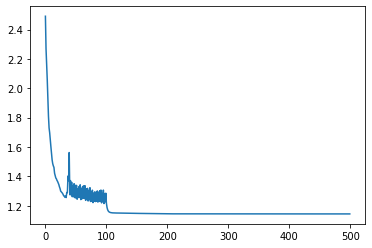

In [73]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Simple_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)
